In [203]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# <div align="center">Bestsellers on Amazon: ***analyzing attributes of "successful" books on the e-commerce platform***
<div align="center">by Lizzie Edwards


Link to GitHub repository: https://github.com/eliz-mcl-edwards/DataWranglingProject-AmazonBestsellingBooks
______

For an individual reader, the purchase of a book is often based less upon the actual quality of the book's content (which the reader can't truly judge until after they've read it), and is actually based more on the perception of the book's quality. Aside from the actual content of the book, there are many factors that contribute to a book's perceived quality, some of which are inherent (i.e. genre and author) and others of which are external (i.e. user ratings,  written reviews, and price). For authors, the perceived quality of their books is of paramount importance, as it affects the sales and subsequent success or failure of their books.  

While "success" is a subjective concept that is also largely based on relative perception, many authors view the measure of their book's success in terms of ending up on a bestseller list. In the modern age of online shopping, Amazon represents one of the largest e-commerce platforms for the sale and delivery of hard copy books. As a result, books on Amazon's bestseller list share one defintion of success, depite being different in terms of the inherent and external factors that affect perceived quality.

In order to help characterize the enigmatic combinations of factors that influence the perceived quality and therefore success of books on Amazon's online platform, a dataset containing information on the 50 bestselling books on Amazon each year from 2009-2019 was obtained. The data featured the title, author, user rating out of 5.0, number of written reviews, price (USD), year of release, and genre (fiction or non-fiction) of each book. These factors which were used to address a number of interesting questions posed below and to gain insights into the nature of successful, bestselling books on Amazon.

*IMPORTANT NOTE: Several book entries in the original dataset were near-duplicates, as several books were re-released in different years or for a different price, and both the release and re-release(s) qualified as bestsellers despite containing the same content. However, these near-duplicates all had the same title, author, rating, and genre associated with them and only hindered achieving valuable results from an analytical standpoint (e.g. the top 10 ranked books being heavily populated by the same book). As a result, I decided to remove the duplicates from the dataset while maintaining the originally released version of the books.*

The following provides a sample of the dataset format after duplicate removal for five of the 351 remaining books:

In [204]:
#Import data
url = 'https://raw.githubusercontent.com/eliz-mcl-edwards/DataWranglingProject-AmazonBestsellingBooks/main/bestsellers%20with%20categories.csv'
books = pd.read_csv(url) #dataset with original index
books.sort_values('Title', inplace = True)
books.drop_duplicates(subset ='Title',keep = 'first', inplace = True)
books.set_index('Title', inplace=True) #dataset with title as index
books.head()

,Author,User Rating,Reviews,Price,Year,Genre
Title,,,,,,
10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction


____
## User Rating and Written Reviews

In order to better understand the factors associated with the successful books on the Amazon bestseller list, it would be useful to characterize the relative perception of the books based on user opinion and accordingly rank the books. The factor of user rating (representing the average rating of a book) and the factor of reviews (representing the number of written reviews of a book) are useful for evaluating the relative perceived quality and "success" of books within the list of bestsellers based on external (user) feedback. Using these factors, we can work to answer the following questions: Which bestselling books were the most highly rated? Which bestselling books had the most reviews?

First, let's look at the distribution of books based on user rating and at the top 10 books ranked based on user rating.

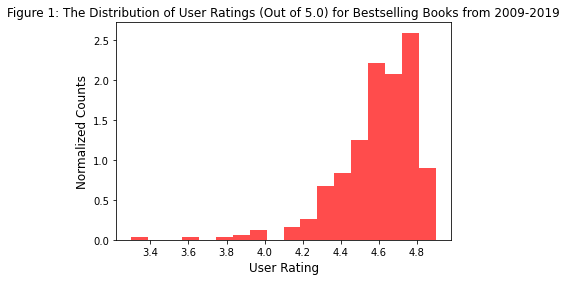

In [205]:
%matplotlib inline
import matplotlib.pylab as plt

user_rating = books['User Rating']

#Create histogram of the distribution of user ratings
num_bins = 18
plt.hist(user_rating, num_bins, facecolor='red', alpha=0.7, density=True);
plt.xlabel('User Rating',fontsize=12);
plt.ylabel('Normalized Counts', fontsize=12);
plt.title("Figure 1: The Distribution of User Ratings (Out of 5.0) for Bestselling Books from 2009-2019");

In [186]:
#Top 10 books ranked based on user rating
books_sorted_rating = books.sort_values(by=['User Rating'], ascending=False)
print("Table 1: The Top 10 Books Ranked Based on User Rating")
books_sorted_rating[:10]

Table 1: The Top 10 Books Ranked Based on User Rating


,Author,User Rating,Reviews,Price,Year,Genre
Title,,,,,,
Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),Rush Limbaugh,4.9,3836,12,2014,Fiction
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052,22,2016,Fiction
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",J.K. Rowling,4.9,3146,30,2017,Fiction
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",J. K. Rowling,4.9,7758,18,2019,Fiction
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),Dav Pilkey,4.9,7235,4,2019,Fiction
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),Rush Limbaugh,4.9,7150,12,2013,Fiction


Additonally, let's look at the distribution of books based on number of written reviews and at the top 10 books ranked based on number of written reviews.

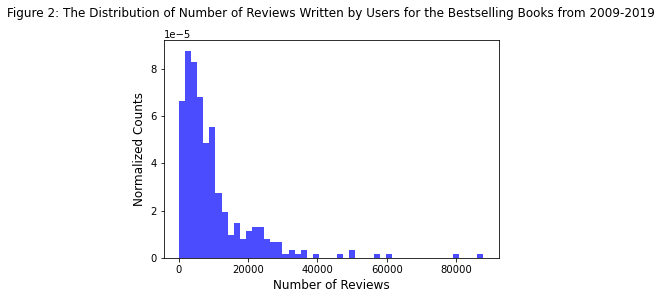

In [206]:
%matplotlib inline
reviews = books['Reviews']

#Create histogram of the distribution of number of reviews
num_bins = 50
plt.hist(reviews, num_bins, facecolor='blue', alpha=0.7, density=True);
plt.xlabel('Number of Reviews',fontsize=12);
plt.ylabel('Normalized Counts', fontsize=12);
plt.title("Figure 2: The Distribution of Number of Reviews Written by Users for the Bestselling Books from 2009-2019", y=1.08);

In [207]:
#Top 10 books ranked based on number of reviews
books_sorted_reviews = books.sort_values(by=['Reviews'], ascending=False)
print("Table 2: The Top 10 Books Ranked Based on Number of Written Reviews")
books_sorted_reviews[:10]

Table 2: The Top 10 Books Ranked Based on Number of Written Reviews


,Author,User Rating,Reviews,Price,Year,Genre
Title,,,,,,
Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James,3.8,47265,14,2012,Fiction
The Martian,Andy Weir,4.7,39459,9,2015,Fiction
All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction


Unsurprisingly, most of the books on the bestseller list are rated quite highly (Fig. 1). Since the rating is only done on a five point scale with a single decimal place (rating/5.0), ranking the books based on user rating isn't very informative as books with the same rating can't be distinguished from one another. This fact is evidenced in Table 1 where the top 10 ranked books were all rated 4.9.

Additionally, examining the books based solely on the number of reviews received isn't extremely informative in terms of ranking by perceived quality relative to other books on the bestseller list because written reviews aren't necessarily positive or negative. While many readers will take the time to write reviews for books they really love, some will also do the same for books they hate. The distribution is also largely focused on the lower end of the spectrum, with most books having less than 20,000 reviews (Fig. 2). While ranking based on the number of reviews allows for differentiation between the top 10 ranked books, it's less clear to what extent the reviews factor reflects perceived quality and relative success of the books.

#### Weighted Rating

As a result, a weighted rating factor that incorporates both the user rating and the number of reviews would be a more appropriate and informative way to rank the books and represent relative success within the Amazon bestseller list. In order to create a rating factor weighted based on the number of reviews, I decided to employ a formula (thought to be) used by the Internet Movie Database (IMBd) to calculate weighted ratings of top movies. The formula is based on Bayesian estimates which consider conditional probabilities of an event based on data and prior information or conditions related to the event. The formula was applied using the user rating and reviews factors, and a new column was added to the dataset containing the weighted rating for each book. The formula is as follows, with the variables adopted to fit the factors of this dataset:

    W = ((R * v) + (C * m)) / (v + m)
    
    W: weighted rating
    R: average user rating
    v: number of written reviews
    C: average rating across all the books
    m: minimum number of reviews for books in the bestseller list

Internet Movie Database. “IMDb | Ratings FAQ.” IMDb Help Center, https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#. Accessed 23 Apr. 2021.

Wikipedia. “IMDb .” Wikipedia, the Free Encyclopedia, Wikimedia Foundation, Inc., 21 Apr. 2021, https://en.wikipedia.org/wiki/IMDb#cite_note-40

In [208]:
#Implement Bayesian estimates formula
user_rating = books['User Rating'] #Defined here again for clarity
reviews = books['Reviews'] #Defined again here for clarity

R = user_rating
v = reviews
C = user_rating.mean()
m = reviews.min()
W = ((R * v) + (C * m)) / (v + m) 

#Create new column for weighted ratings in books dataset
books['Weighted_Rating'] = W

In [209]:
#Top 10 books ranked based on weighted ranking
books_sorted_weighted = books.sort_values(by=['Weighted_Rating'], ascending=False)
print("\nTable 3: The Top 10 Books Ranked Based on Weighted Ranking")
books_sorted_weighted[:10]


Table 3: The Top 10 Books Ranked Based on Weighted Ranking


,Author,User Rating,Reviews,Price,Year,Genre,Weighted_Rating
Title,,,,,,,
"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction,4.899507
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction,4.899452
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,4.9,19576,8,2011,Non Fiction,4.899451
The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction,4.899450
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction,4.899251
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Dav Pilkey,4.9,12619,8,2019,Fiction,4.899149
"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",Jill Twiss,4.9,11881,13,2018,Fiction,4.899096
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052,22,2016,Fiction,4.898932
Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,4.898860


It's clear that ranking the bestsellers by user rating, number of written reviews, and weighted rating all produce vastly different results for the top 10 books (Tables 1, 2, and 3).

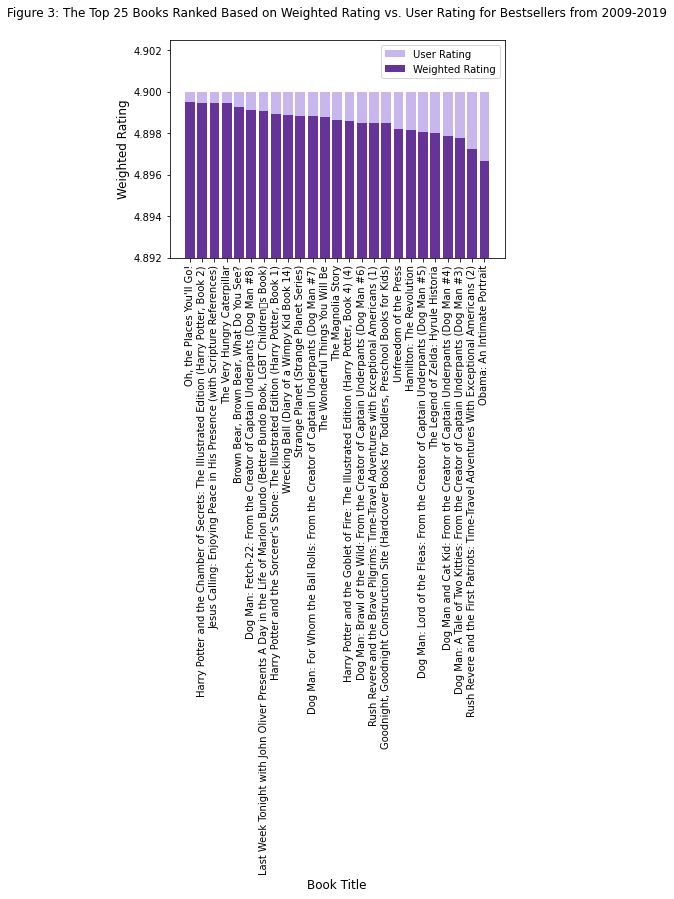

In [210]:
%matplotlib inline
books_flat = books.reset_index()
books_flat_sorted_weighted = books_flat.sort_values(by=['Weighted_Rating'], ascending=False)

#Create bar plot to illustrate distinguishable differences between books based on weighted rating
plt.bar(books_flat_sorted_weighted['Title'][:25], books_flat_sorted_weighted['User Rating'][:25], color='mediumpurple', alpha=0.5);
plt.bar(books_flat_sorted_weighted['Title'][:25], books_flat_sorted_weighted['Weighted_Rating'][:25], color='rebeccapurple');
plt.xticks(rotation='vertical');
plt.ylim(4.892, 4.9025);
plt.xlabel('Book Title',fontsize=12);
plt.ylabel('Weighted Rating', fontsize=12);
plt.title("Figure 3: The Top 25 Books Ranked Based on Weighted Rating vs. User Rating for Bestsellers from 2009-2019", y=1.08);
plt.legend(labels = ["User Rating", "Weighted Rating"]);

As showcased in Table 3, the weighted rating factor is a metric that better reflects the relative success and perceived quality of the books in the bestseller list by providing a factor containing actual differences between the books, as the weighted rating enables us to distingish the relative ranking between bestsellers that have the same two-digit user rating. Moreover, to illustrate the usefulness of the weighted rating and the shortcomings of the traditional user rating, Figure 3 displays the top 25 books ranked based on weighted rating overlaid on the user rating of the same books. While the user rating is the same for all 25 books, the weighted rating incorporates number of reviews into the rating to reflect actual differences in relative ranking between the books. The differences in weighted ranking between books are important, but can be quite small, hence the truncated scale in Figure 3.

#### Weighted Rating: Fiction vs. Non-fiction

In addition to the overall ranking of bestsellers based on weighted rating, assessing whether the weighted ratings differed between fiction and non-fiction books would also be useful to see if any trends existed based on the inherent factor of genre. Using the weighted rating and the genre factors, we can answer the question: Overall, were fiction or non-fiction books more highly rated on average (based on weighted rating)?

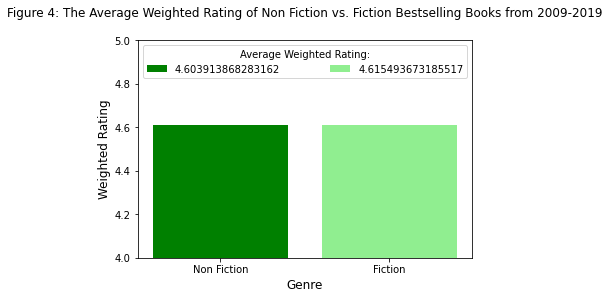

In [211]:
%matplotlib inline
#Create copy of books dataframe with multi-index of genre (fiction vs. nonfiction) and title
books_genre = books.copy()
books_genre.reset_index(level = 'Title', inplace = True)
books_genre.set_index(['Genre', 'Title'], inplace=True)
books_genre.sort_index(level = 'Genre', inplace=True)

#Calculate average weighted rating 
weighted_rating_fiction = books_genre.loc['Fiction']['Weighted_Rating'].mean()
weighted_rating_nonfiction = books_genre.loc['Non Fiction']['Weighted_Rating'].mean()

genre_plot = plt.bar(books['Genre'], books['Weighted_Rating'].mean(), color=['green', 'lightgreen'])
genre_plot;
plt.ylim(4, 5);
plt.xlabel('Genre',fontsize=12);
plt.ylabel('Weighted Rating', fontsize=12);
plt.title("Figure 4: The Average Weighted Rating of Non Fiction vs. Fiction Bestselling Books from 2009-2019", y=1.08);
plt.legend((genre_plot[0], genre_plot[1]), (weighted_rating_nonfiction, weighted_rating_fiction), ncol = 2, mode = 'expand', title = "Average Weighted Rating:")

According to Figure 4 above and the calculated average weighted ratings across all the books in each genre, there's very minimal differences in the average weighted rating between non-fiction and fiction books on the best sellers list across the whole time period. Based on the difference of approximatly 0.0116 between the two categories, there's a very weak correlation between genre and weighted rating with fiction books rated slightly higher on average. Due to the small amrgin between genre ratings, the success or perceived quality of a book isn't solely based on whether it is fiction or non-fiction.

#### Overarching Conclusions:

In terms of the questions regarding which bestselling books were the most highly rated and the most reviewed, the weighted rating enables a more complete assessment of the books' relative success and perceived quality based on these factors, and allows us to distinguish between the books and rank them within the bestsellers list. Based on the results displayed in Table 3 and Figure 3, "Oh, the Places You'll Go!" by Dr. Seuss was the top ranked book overall with a weighted rating of 4.899507. Additionally, fiction books were rated slightly higher on average (based on weighted rating) with nine of the top 10 highest ranked books in the bestseller list being in the fiction genre, indicating that fiction books may have greater relative success or perceived quality on Amazon; however, the small difference between the overall weighted ratings of the two genres indicates that such correlations are likely weak.
_____

____
## Price

After using the factors of user rating and number of written reviews to calculate weighted ratings for each book, we can now examine other external factors such as price and look for trends in the pricing of books over time and related to genre. By examining the relationship of price with other external factors, we can further characterize the attributes of successful books on Amazon's bestseller list over time and address the following questions: Over the past decade, which bestseller was featured at the highest price and the lowest price? Which genre of books was priced higher on average and did this change over time? What was the relationship between price and weighted rating?

To start, let's take a look at the books on the low and high ends of the price spectrum and examine their attributes:

In [212]:
#Book with lowest overall price
print("The Amazon bestseller with the lowest price from 2009-2019:\n", 
      books['Price'].idxmin())

print("\nBook Attributes:")
pd.DataFrame(books.loc[books['Price'].idxmin()])

The Amazon bestseller with the lowest price from 2009-2019:
 Cabin Fever (Diary of a Wimpy Kid, Book 6)

Book Attributes:


,"Cabin Fever (Diary of a Wimpy Kid, Book 6)"
Author,Jeff Kinney
User Rating,4.8
Reviews,4505
Price,0
Year,2011
Genre,Fiction
Weighted_Rating,4.798443


In [213]:
#Book with highest overall price
print("The Amazon bestseller with the highest price from 2009-2019:\n", 
      books['Price'].idxmax())

print("\nBook Attributes:")
pd.DataFrame(books.loc[books['Price'].idxmax()])

The Amazon bestseller with the highest price from 2009-2019:
 Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5

Book Attributes:


,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5"
Author,American Psychiatric Association
User Rating,4.5
Reviews,6679
Price,105
Year,2013
Genre,Non Fiction
Weighted_Rating,4.5006


Based on the above result, there's clearly a wide diversity of prices ranging from 0 to 105 dollars. It's unclear from just the data why a bestseller would be priced at zero dollars unless it was a sale or marketing tactic to increase stats in the other factors (rating, reviews) through positive public opinion. Given that the book with the lowest price is from a children's book series ("Diary of a Wimpy Kid"), it's reasonable that it would be on the lower end of the price spectrum as kid's books tend to be less expensive. The highest priced book, "Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5", is a textbook which are notoriously expensive, and it therefore makes sense why this book is on the high end of the price spectrum.

#### Price: Fiction vs. Non-Fiction

Next let's look at price related to genre over time.

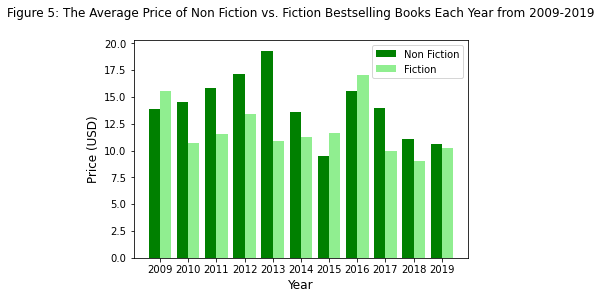

In [214]:
%matplotlib inline

#Create copy of books dataframe with multi-index of genre, year, and title
books_genre_year = books_flat.set_index(['Genre', 'Year', 'Title'])

#Get average prices per year for fiction and nonfiction books
fiction_price = books_genre_year.loc['Fiction']['Price'].sum(level='Year') / books_genre_year.loc['Fiction']['Price'].count(level='Year') 
nonfiction_price = books_genre_year.loc['Non Fiction']['Price'].sum(level='Year') / books_genre_year.loc['Non Fiction']['Price'].count(level='Year')
years = np.arange(2009, 2020)

#Plot average price of books per year for both genres
price_plot = plt.bar(years-0.2, nonfiction_price, color='green', width = 0.4);
plt.bar(years+0.2, fiction_price, color='lightgreen', width = 0.4)
price_plot;
plt.xticks(years);
plt.xlabel('Year',fontsize=12);
plt.ylabel('Price (USD)', fontsize=12);
plt.title("Figure 5: The Average Price of Non Fiction vs. Fiction Bestselling Books Each Year from 2009-2019", y=1.08);
plt.legend(["Non Fiction", "Fiction"])

The results in Figure 5 illustrate that non-fiction books tend to be priced higher on average than fiction books, as the mean price for non-fiction books was higher than the mean price for fiction books in eight out of the eleven years. Additionally, from 2010-2013 the disparity between the price of non-fiction and fiction books was particularly large. However, in more recent years there appears to be an overall decreasing trend in book price with the average prices of the two genres approaching each other and becoming more equal.

#### Price and Weighted Rating
In addition to analyzing price in regard to genre, we'll also explore a potential relationship between price and weighted rating. It's possible that the price of a book could influence how a reader would rate the book (out of 5.0) and if they would feel compelled to leave a review. 

Text(0.5, 1.08, 'Figure 6: The Weighted Rating Based on Price for Bestselling Books from 2009-2019')

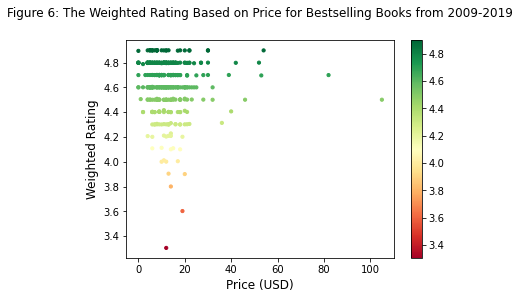

In [215]:
%matplotlib inline

plt.scatter(books['Price'], books['Weighted_Rating'], s = 10, c=books['Weighted_Rating'], cmap='RdYlGn');
plt.colorbar();
plt.xlabel('Price (USD)',fontsize=12);
plt.ylabel('Weighted Rating', fontsize=12);
plt.title("Figure 6: The Weighted Rating Based on Price for Bestselling Books from 2009-2019", y=1.08)

Based on the distribution of the data points representing each bestselling book, there doesn't appear to be any clear correlation between price and the resulting weighted rating (based on user rating and number of reviews). The vast majority of the distribtuion falls between the prices of 0-30 dollars wherein essentially the whole range of weighted ratings exists across the books. For the outliers priced above 30 dollars, they all seem to have relatively high weighted ratings greater than 4.3 despite the increased price. As a result, price doesn't seem to have a significant impact on weighted rating.

#### Overarching Conclusions:

After viewing the books that populate both ends of the price spectrum and analyzing how price is related to genre, the results indicate that non-fiction books tend to be priced higher on average; this trend is even reflected by the genre of the most expensive and least expensive books on the bestseller list. However, the average prices of the books in each genre appear to be moving closer to equalizing over time. Additionally, there was no clear relationship between the price and weighted rating factors. Weighted rating was previously used to rank the bestsellers relative to one another, and since there was no relationship with this factor to price, the results indicate that price doesn't bare a strong influence on the perceived quality or success of the books within the bestseller list.
_____

## Author

In addition to the external factors of weighted rating and price and their relationship to the the success and perceived quality of the books on Amazon's bestseller list, we'll also investigate the relative success of the bestsellers based on the inherent factor of authorship. While it can be difficult for authors to get exposure and gain popularity for their books, once an author gets acclaim for one book, it often becomes easier to write additional successful books; sometimes this takes the shape of a contiguous series of popular books or multiple stand-alone books that are bolstered by the author's acclaim from previous books. As a result, many of the authors on the bestseller list from 2009-2019 are likely to appear multiple times for different books. Therefore, it would be interesting to answer the following questions in regard to author: Which author has written the most bestsellers? For authors with multiple bestselling books, which author's books collectively have the highest average weighted rating?

In [216]:
#Create copy of books dataframe with author as index
books_author = books_flat.set_index(['Author', 'Title'])
books_author.sort_values('Author', inplace = True)

#Create dataframe of authors and the number of bestsellers they wrote from 2009-2019
authors_num_bestsellers = pd.DataFrame()
authors_num_bestsellers['Number_Bestsellers'] = books_author['User Rating'].count(level='Author')
authors_num_bestsellers.sort_values(by=['Number_Bestsellers'], ascending=False, inplace=True)

print("\nTable 4: The Top 10 Authors Ranked by Number of Bestselling Books on Amazon from 2009-2019")
authors_num_bestsellers[:10]


Table 4: The Top 10 Authors Ranked by Number of Bestselling Books on Amazon from 2009-2019


,Number_Bestsellers
Author,
Jeff Kinney,12
Rick Riordan,10
Stephenie Meyer,7
J.K. Rowling,6
Bill O'Reilly,6
Dav Pilkey,6
E L James,5
John Grisham,5
Suzanne Collins,5


Based on the results displayed in Table 4 above, Jeff Kinney was the author with the most  books (12) on the bestseller list from 2009-2019, followed shortly by Rick Riordan with 10 books. Notably, the top five authors with the most bestselling books all authored very popular series that contained multiple books:
   - Jeff Kinney: "Diary of a Wimpy Kid" series
   - Rick Riordan: "Percy Jackson & the Olympians" series
   - Stephanie Meyer: "Twilight" series
   - J.K. Rowling: "Harry Potter" series
   - Bill O'Reilly: "Killing" series

The fact that these authors had the most bestselling books indicates that authors who wrote popular series of books (as opposed to multiple popular stand-alones) were more likely to have numerous bestselling books purchased on Amazon. Now let's examine the ranking of authors based on the average weighted rating across their bestselling books.

In [217]:
#Add column of average weighted rating for each author
authors_num_bestsellers['Avg_Weighted_Rating'] = books_author['Weighted_Rating'].mean(level = 'Author')

print("\nTable 5: The Top 10 Authors Ranked by Average Weighted Rating of their Bestselling Books on Amazon from 2009-2019")
authors_num_bestsellers[:10].sort_values(by=['Avg_Weighted_Rating'], ascending=False)


Table 5: The Top 10 Authors Ranked by Average Weighted Rating of their Bestselling Books on Amazon from 2009-2019


,Number_Bestsellers,Avg_Weighted_Rating
Author,,
Dav Pilkey,6,4.898364
Jeff Kinney,12,4.798658
Rick Riordan,10,4.767458
Suzanne Collins,5,4.679875
Stephenie Meyer,7,4.656837
Bill O'Reilly,6,4.633222
Stephen King,4,4.525618
J.K. Rowling,6,4.450053
John Grisham,5,4.401140


Based on Tables 4 and 5, ranking the top 10 authors by the number of bestsellers they've written versus ranking by the average weighted rating across each author's collective books produces a different order. The authors who wrote the most bestsellers didn't necessarily write books that had a consistent weighted rating. For example, while J.K. Rowling wrote 6 best selling books, they had an average weighted rating of around 4.45 indicating there was more variation in the user rating and number of reviews given to her books compared to Jeff Kinney who wrote 12 bestsellers that still had an average weihted rating of 4.79. However, it's important to consider that comparing average weighted ratings between authors can be misleading if they had different numbers of books on the bestselling list over the years.

#### Overarching Conclusions:

The results diplayed in the tables above from the analyses conducted using the author factor indicate that author can play a role in the relative success of bestselling books on Amazon. When an author writes a book that is well-received by the public and gains popularity, it is more likely to be bought and therefore more likely to end up on the best seller list. For the first book that an author writes, they're more-or-less on even playing ground with other first-time authors as they don't have a track record in terms of the perceived quality of their written work. However, after an author has written a popular bestselling book, their previously attained acclaim can play a role in how other books that they write will be perceived and readers may be more likely to buy their new books. We see evidence of this in Table 4, wherein there are many authors with multiple books on the bestseller list from 2009-2019. Moreover, the impact of an author having previously had a bestseller on the likelihood of producing other bestsellers appears to be particularly applicable to popular series of books. Logically, if the author writes a bestselling book that's part of a series, it's likely that most of the readers will purchase the other books in the series in order to finish the story; thereby causing the other books in the series to become bestsellers as well.

While it's interesting to see the average weighted ratings of the bestsellers written by the different authors, it doesn't dictate the relative success of the authors' collective works as the ranking of authors based on number of bestseller versus the ranking based on average weighted rating differ. Although, some authors are clearly able to accomplish writing many bestselling books while maintaining high perceived quality, as in the cases of Jeff Kinney and Rick Riordan who rank highly based on both number of bestselling books and average weighted rating of those books.
_____

## Conclusions

In an effort to characterize the nature of "successful" books on the Amazon bestseller list from 2009-2019, several analyses were run to investigate the influence of different external and inherent factors and their impact on the relative perceived quality of the books as a product of these factors.

As external factors, user rating and number of reviews seemed to be useful metrics to gauge perceived quality of the books; however, since user rating featured a five point scale with a single decimal place, many books had the same rating and could't be distinguished from one another or ranked. Additionally, while the factor for number of written reviews featured more variety in values and enabled the bestsellers to be ranked relative to one another, it was less clear to what extent the reviews factor reflected the perceived quality and success of the books. While analyses conducted with either of these factors weren't very informative, they helped illustrate the value of the weighted rating factor created to reflect user rating weighted by the number of reviews.

The weighted rating factor provided numerically distinct values that could be used to distinguish between the books, and proved to be extremely valuable for comparing the bestsellers based on other factors and evaluating their relative success and perceived quality. For instance, weighted rating was used to investigate the potential influence of the inherent factor of genre. Based on the results, fiction books were rated slightly higher on average (based on weighted rating), and 9 out of the 10 highest rated books on the bestseller list were fiction. While this result appears to indicate that fiction books may have greater success or perceived quality on Amazon, the difference between the overall weighted ratings of the two genres was small, and such correlations between genre and success are likely weak.

In addition to the evaluating the influence of the genre factor on the basis of weighted rating, genre was also investigated in relation to the external factor of price. Based on the results of the analysis, non-fiction books were priced higher on average than fiction books were over the course of the decade. This finding was reflected in the attributes of both the most expensive book (which was non-ficiton) and the least expensive book (which was fiction), and in the figure displaying average price of genre per year wherein non-fiction books were more expensive in 8 out of the 11 years. More recently, there also appeared to be an overall decreasing trend in price with the prices of both genres approaching each other and moving towards equalization. While there was a relationship evident between price and genre, further analysis revealed a lack of relationship between price and weighted rating, as the results showed that price doesn't bare a strong influence on the perceived quality or success of the books (based on weighted rating) within the bestseller list.

Finally, the inherent factor of author was investigated relative to its influence on the success of books and on the number of bestselling books in relation to who wrote them. According to the analyses conducted above, the author factor can influence the relative success of bestselling books on Amazon, particularly if the author has previously written a different bestseller. After an author has written a popular bestselling book, their previously attained acclaim can influence the perceived quality of other books they write, making the new books more likely to be bought on Amazon and more likely to end up on the bestseller list. The affect of this phenomenon was especially evident for authors who wrote popular series of books (as opposed to multiple popular stand-alones), as the top five authors with the most bestsellers on Amazon between 2009-2019 all authored very popular series containing multiple books.

While the relative success and perceived quality of bestselling book can be subjective and liable to vary based on platform, the above results can help us to characterize the combinations and interactions of factors such as user rating, number of reviews, weighted rating, price, genre, and author related to books on Amazon's bestsellers list, and to better understand the nature of successful books on e-commerce platforms as a whole.